# Time Series Correlation

Code from [Towards Data Science](https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9)

Other resources:
[Applied Time Series Analysis](https://nwfsc-timeseries.github.io/atsa-labs/sec-tslab-correlation-within-and-among-time-series.html)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import glob

home_dir = os.getenv("HOME")
home_dir

'/Users/megmcmahon'

In [2]:
home_dir + "/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/*.csv"

'/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/*.csv'

In [3]:
act_files = glob.glob(home_dir + "/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/*.csv")
act_files[0:5]

['/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10011_10_24_2019_4_30_00_PM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10012_10_18_2019_3_30_00_PM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10014_11_11_2019_5_20_00_PM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10016_1_24_2020_11_45_00_AM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10023_11_11_2019_1_50_00_PM_New_Analysis.csv']

In [139]:
# resample actiwatch data to 1 minute bins

act = pd.read_csv(act_files[1], skiprows=156)
act['Time'] = pd.to_datetime(act['Date'] + ' ' + act['Time'])
act = act.set_index(act['Time'])
act = act.resample('1T').sum()
act[0:5]

,Line,Activity,Sleep/Wake,Unnamed: 6
Time,,,,
2019-10-18 15:30:00,3,335.0,0.0,0.0
2019-10-18 15:31:00,7,478.0,0.0,0.0
2019-10-18 15:32:00,11,77.0,2.0,0.0
2019-10-18 15:33:00,15,109.0,2.0,0.0
2019-10-18 15:34:00,19,613.0,2.0,0.0


In [140]:
fitbit_files = glob.glob(home_dir + "/Box/CogNeuroLab/Wearables/data/fitbit/*minuteStepsNarrow*", recursive=True)
fitbit_files[0:15]

['/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10011_minuteStepsNarrow_20190901_20200327.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10012_minuteStepsNarrow_20190901_20200327.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10014_minuteStepsNarrow_20190901_20200327.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10016_minuteStepsNarrow_20190901_20200327.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10023_minuteStepsNarrow_20190901_20200327.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10024_minuteStepsNarrow_20190901_20200327.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10025_minuteStepsNarrow_20190901_20200327.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10033_minuteStepsNarrow_20190901_20200327.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10035_minuteStepsNarrow_20190901_20200327.csv',
 '/Users/megmcmahon

In [141]:
fit = pd.read_csv(fitbit_files[1])
fit['Time'] = pd.to_datetime(fit['ActivityMinute'])
fit['Activity'] = fit['Steps']
fit = fit.set_index(fit['Time'])
fit[0:5]

,ActivityMinute,Steps,Time,Activity
Time,,,,
2019-10-18 00:00:00,10/18/2019 12:00:00 AM,0,2019-10-18 00:00:00,0
2019-10-18 00:01:00,10/18/2019 12:01:00 AM,0,2019-10-18 00:01:00,0
2019-10-18 00:02:00,10/18/2019 12:02:00 AM,0,2019-10-18 00:02:00,0
2019-10-18 00:03:00,10/18/2019 12:03:00 AM,0,2019-10-18 00:03:00,0
2019-10-18 00:04:00,10/18/2019 12:04:00 AM,0,2019-10-18 00:04:00,0


In [142]:
df = []
df = pd.merge(act, fit, how='inner', left_index=True, right_index=True, suffixes = ('_Act', '_Fit'))
df = df[['Activity_Act', 'Activity_Fit']]
df[0:5]

,Activity_Act,Activity_Fit
Time,,
2019-10-18 15:30:00,335.0,105
2019-10-18 15:31:00,478.0,90
2019-10-18 15:32:00,77.0,13
2019-10-18 15:33:00,109.0,0
2019-10-18 15:34:00,613.0,80


### Check missing values

In [11]:
print('Subject missing %s values from Actiwatch' % df['Activity_Act'].isnull().sum())
print('Subject missing %s values from Fitbit' % df['Activity_Fit'].isnull().sum())

Subject missing 0 values from Actiwatch
Subject missing 0 values from Fitbit


In [143]:
overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# out: Pandas computed Pearson r: 0.2058774513561943

r, p = stats.pearsonr(df.dropna()['Activity_Act'], df.dropna()['Activity_Fit'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# out: Scipy comput

Pandas computed Pearson r: 0.7624352988259909
Scipy computed Pearson r: 0.7624352988259291 and p-value: 0.0


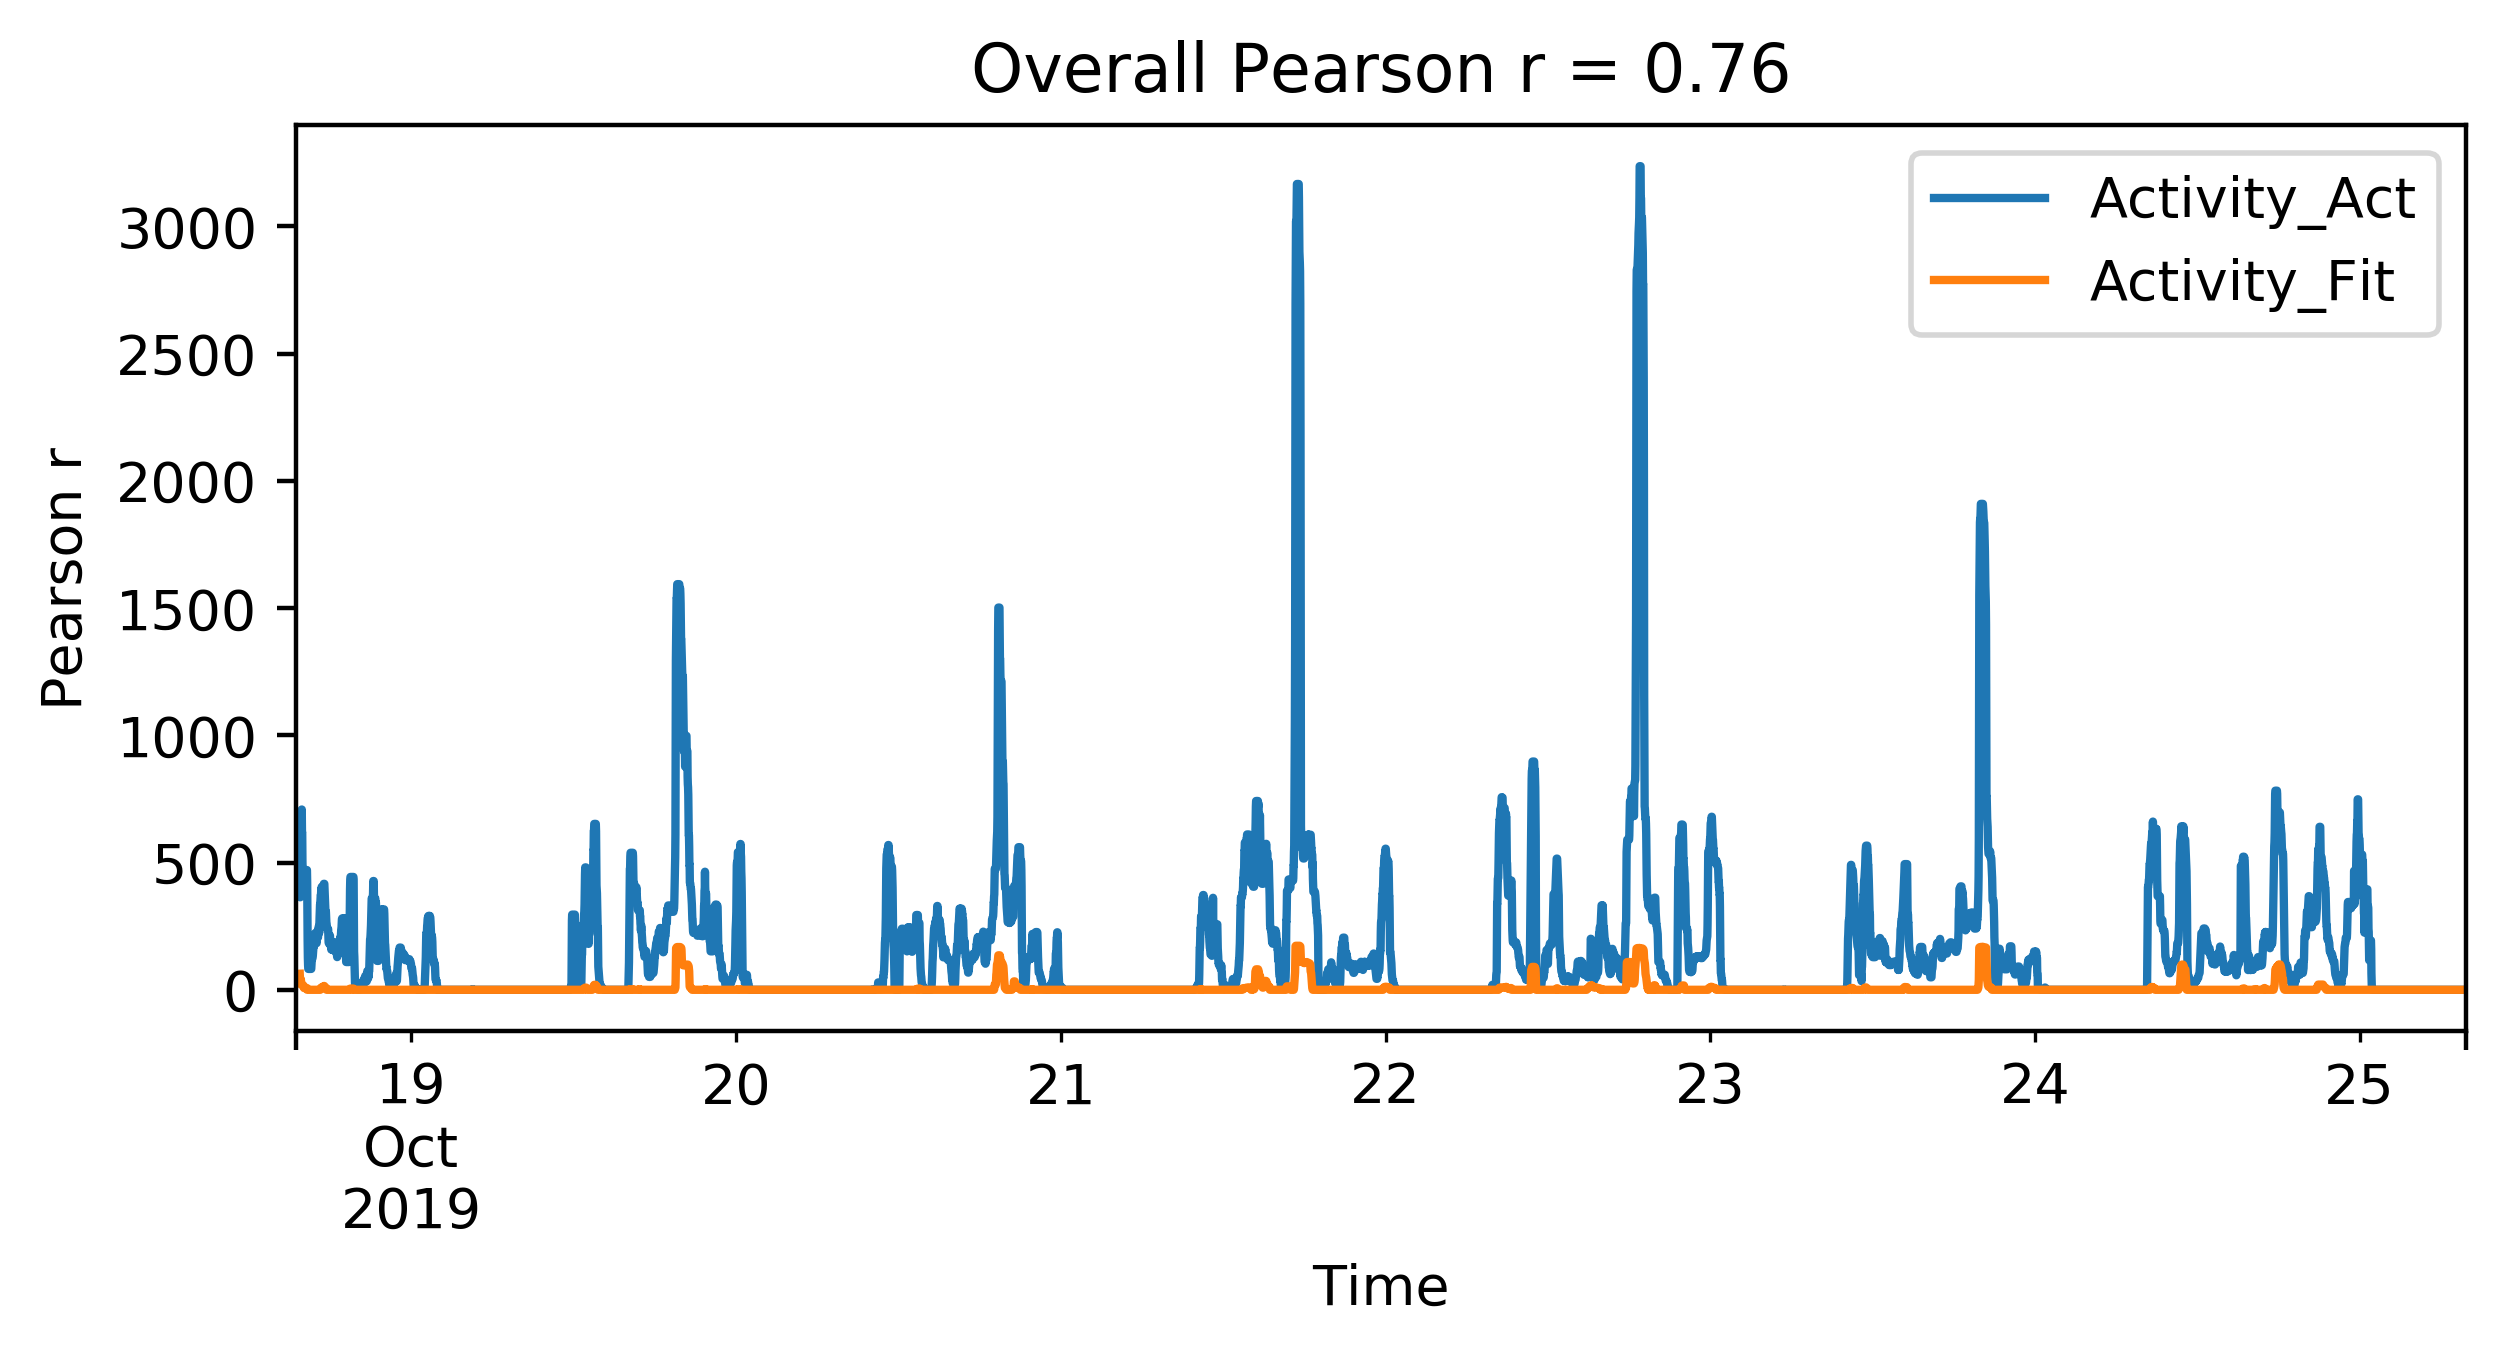

In [144]:
f,ax=plt.subplots(figsize=(7,3), dpi=400)
df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Text(0.5, 0.98, 'Activity data and rolling window correlation')

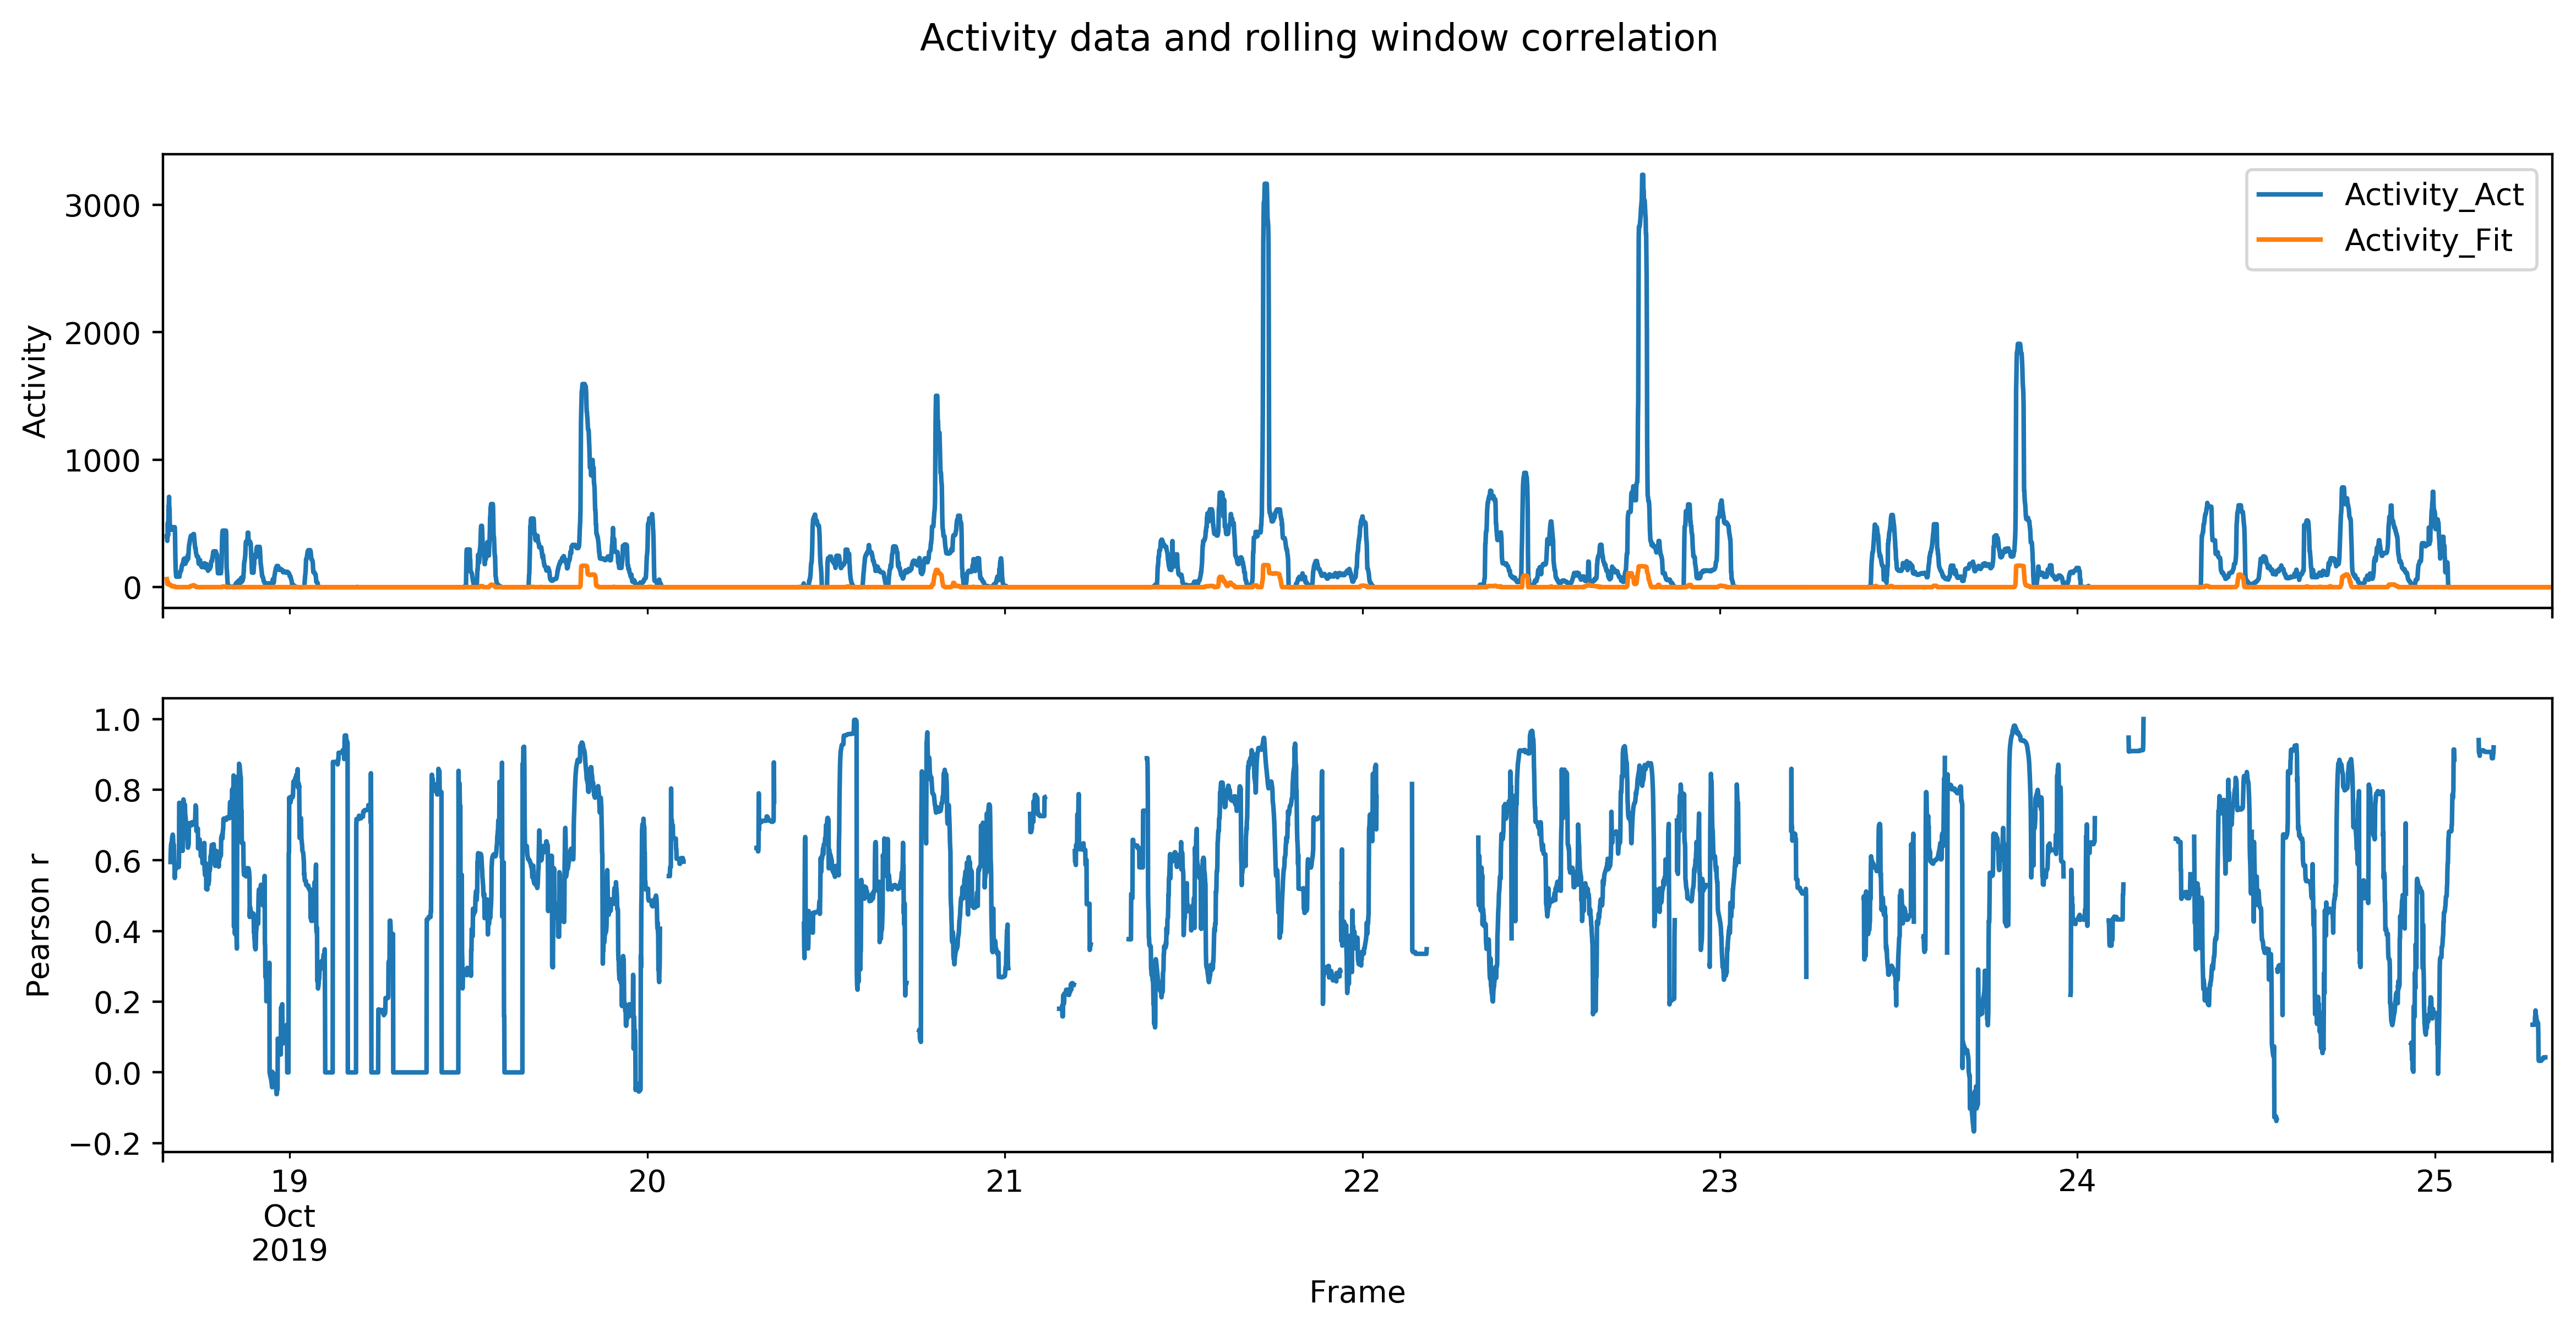

In [145]:
# Set window size to compute moving window synchrony.
r_window_size = 60
# Interpolate missing data.
df_interpolated = df.interpolate()
df_interpolated = df_interpolated
# Compute rolling window synchrony
rolling_r = df_interpolated['Activity_Act'].rolling(window=r_window_size, center=True).corr(df_interpolated['Activity_Fit'])
f,ax=plt.subplots(2,1,figsize=(14,6), dpi=400, sharex=True)
df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Activity')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Activity data and rolling window correlation")


In [146]:
rolling_r

Time
2019-10-18 15:30:00   NaN
2019-10-18 15:31:00   NaN
2019-10-18 15:32:00   NaN
2019-10-18 15:33:00   NaN
2019-10-18 15:34:00   NaN
                       ..
2019-10-25 07:49:00   NaN
2019-10-25 07:50:00   NaN
2019-10-25 07:51:00   NaN
2019-10-25 07:52:00   NaN
2019-10-25 07:53:00   NaN
Length: 9624, dtype: float64

Not great!

## At what times of day are correlation values low?

In [71]:
df_interpolated[df_interpolated.index.isin(rolling_r[rolling_r < 0.5].index)]

,Activity_Act,Activity_Fit
Time,,
2019-10-18 20:15:00,0.0,0
2019-10-18 20:16:00,261.0,4
2019-10-18 20:17:00,143.0,0
2019-10-18 20:18:00,0.0,0
2019-10-18 20:19:00,28.0,0
...,...,...
2019-10-25 07:20:00,0.0,0
2019-10-25 07:21:00,55.0,0
2019-10-25 07:22:00,0.0,0


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0, 0.5, 'Number of Minutes')

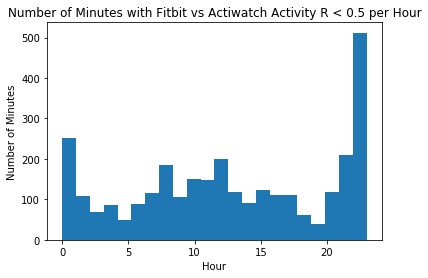

In [84]:
import datetime as dt

df_lowr = df_interpolated[df_interpolated.index.isin(rolling_r[rolling_r < 0.5].index)]
df_lowr['Time'] = pd.to_datetime(df_lowr.index)
df_lowr['times'] = df_lowr['Time'].dt.hour
#df_lowr.groupby(df_lowr['times']).sum()
fig, ax = plt.subplots()
ax.hist(df_lowr['times'], bins=22)
plt.title("Number of Minutes with Fitbit vs Actiwatch Activity R < 0.5 per Hour")
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Minutes')

Fitbit and Actiwatch have low correlation values around 23:00-01:00 for this participant.

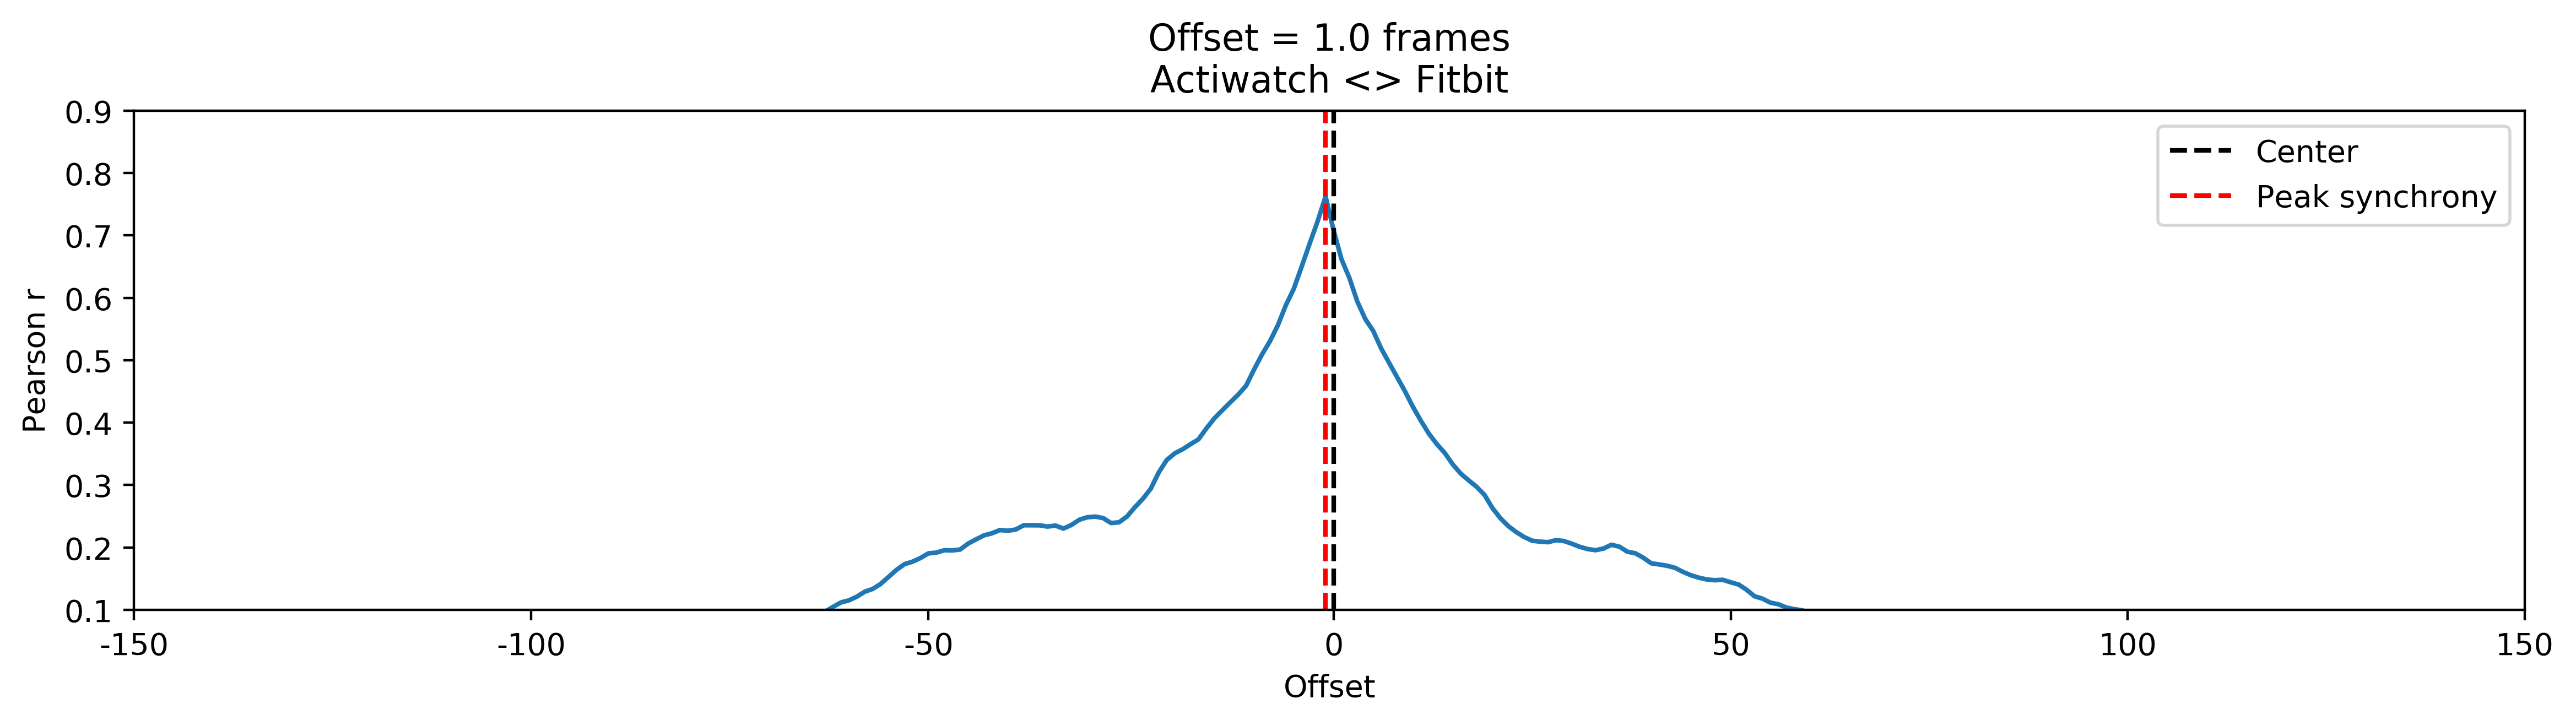

In [44]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df['Activity_Act']
d2 = df['Activity_Fit']
minutes = 5
fpm = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(minutes*fpm),int(minutes*fpm+1))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)

f,ax=plt.subplots(figsize=(14,3), dpi=400)
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nActiwatch <> Fitbit',ylim=[.1,.9],xlim=[90,211], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

In the plot above, we can infer from the negative offset that Actiwatch is leading the interaction (correlation is maximized when Fitbit is pulled forward by 1 frames).

In [47]:
dfn = df.reset_index()
dfn

,Time,Activity_Act,Activity_Fit
0,2019-10-18 15:30:00,335.0,105
1,2019-10-18 15:31:00,478.0,90
2,2019-10-18 15:32:00,77.0,13
3,2019-10-18 15:33:00,109.0,0
4,2019-10-18 15:34:00,613.0,80
...,...,...,...
9619,2019-10-25 07:49:00,0.0,0
9620,2019-10-25 07:50:00,0.0,0
9621,2019-10-25 07:51:00,0.0,0
9622,2019-10-25 07:52:00,0.0,0


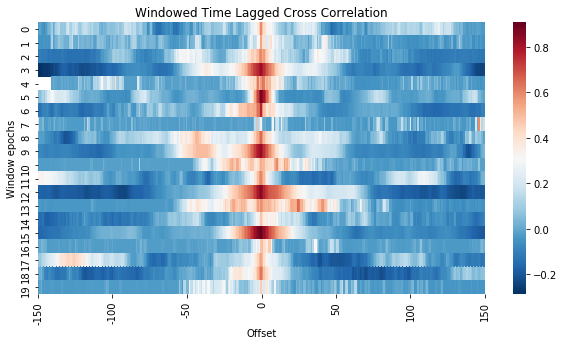

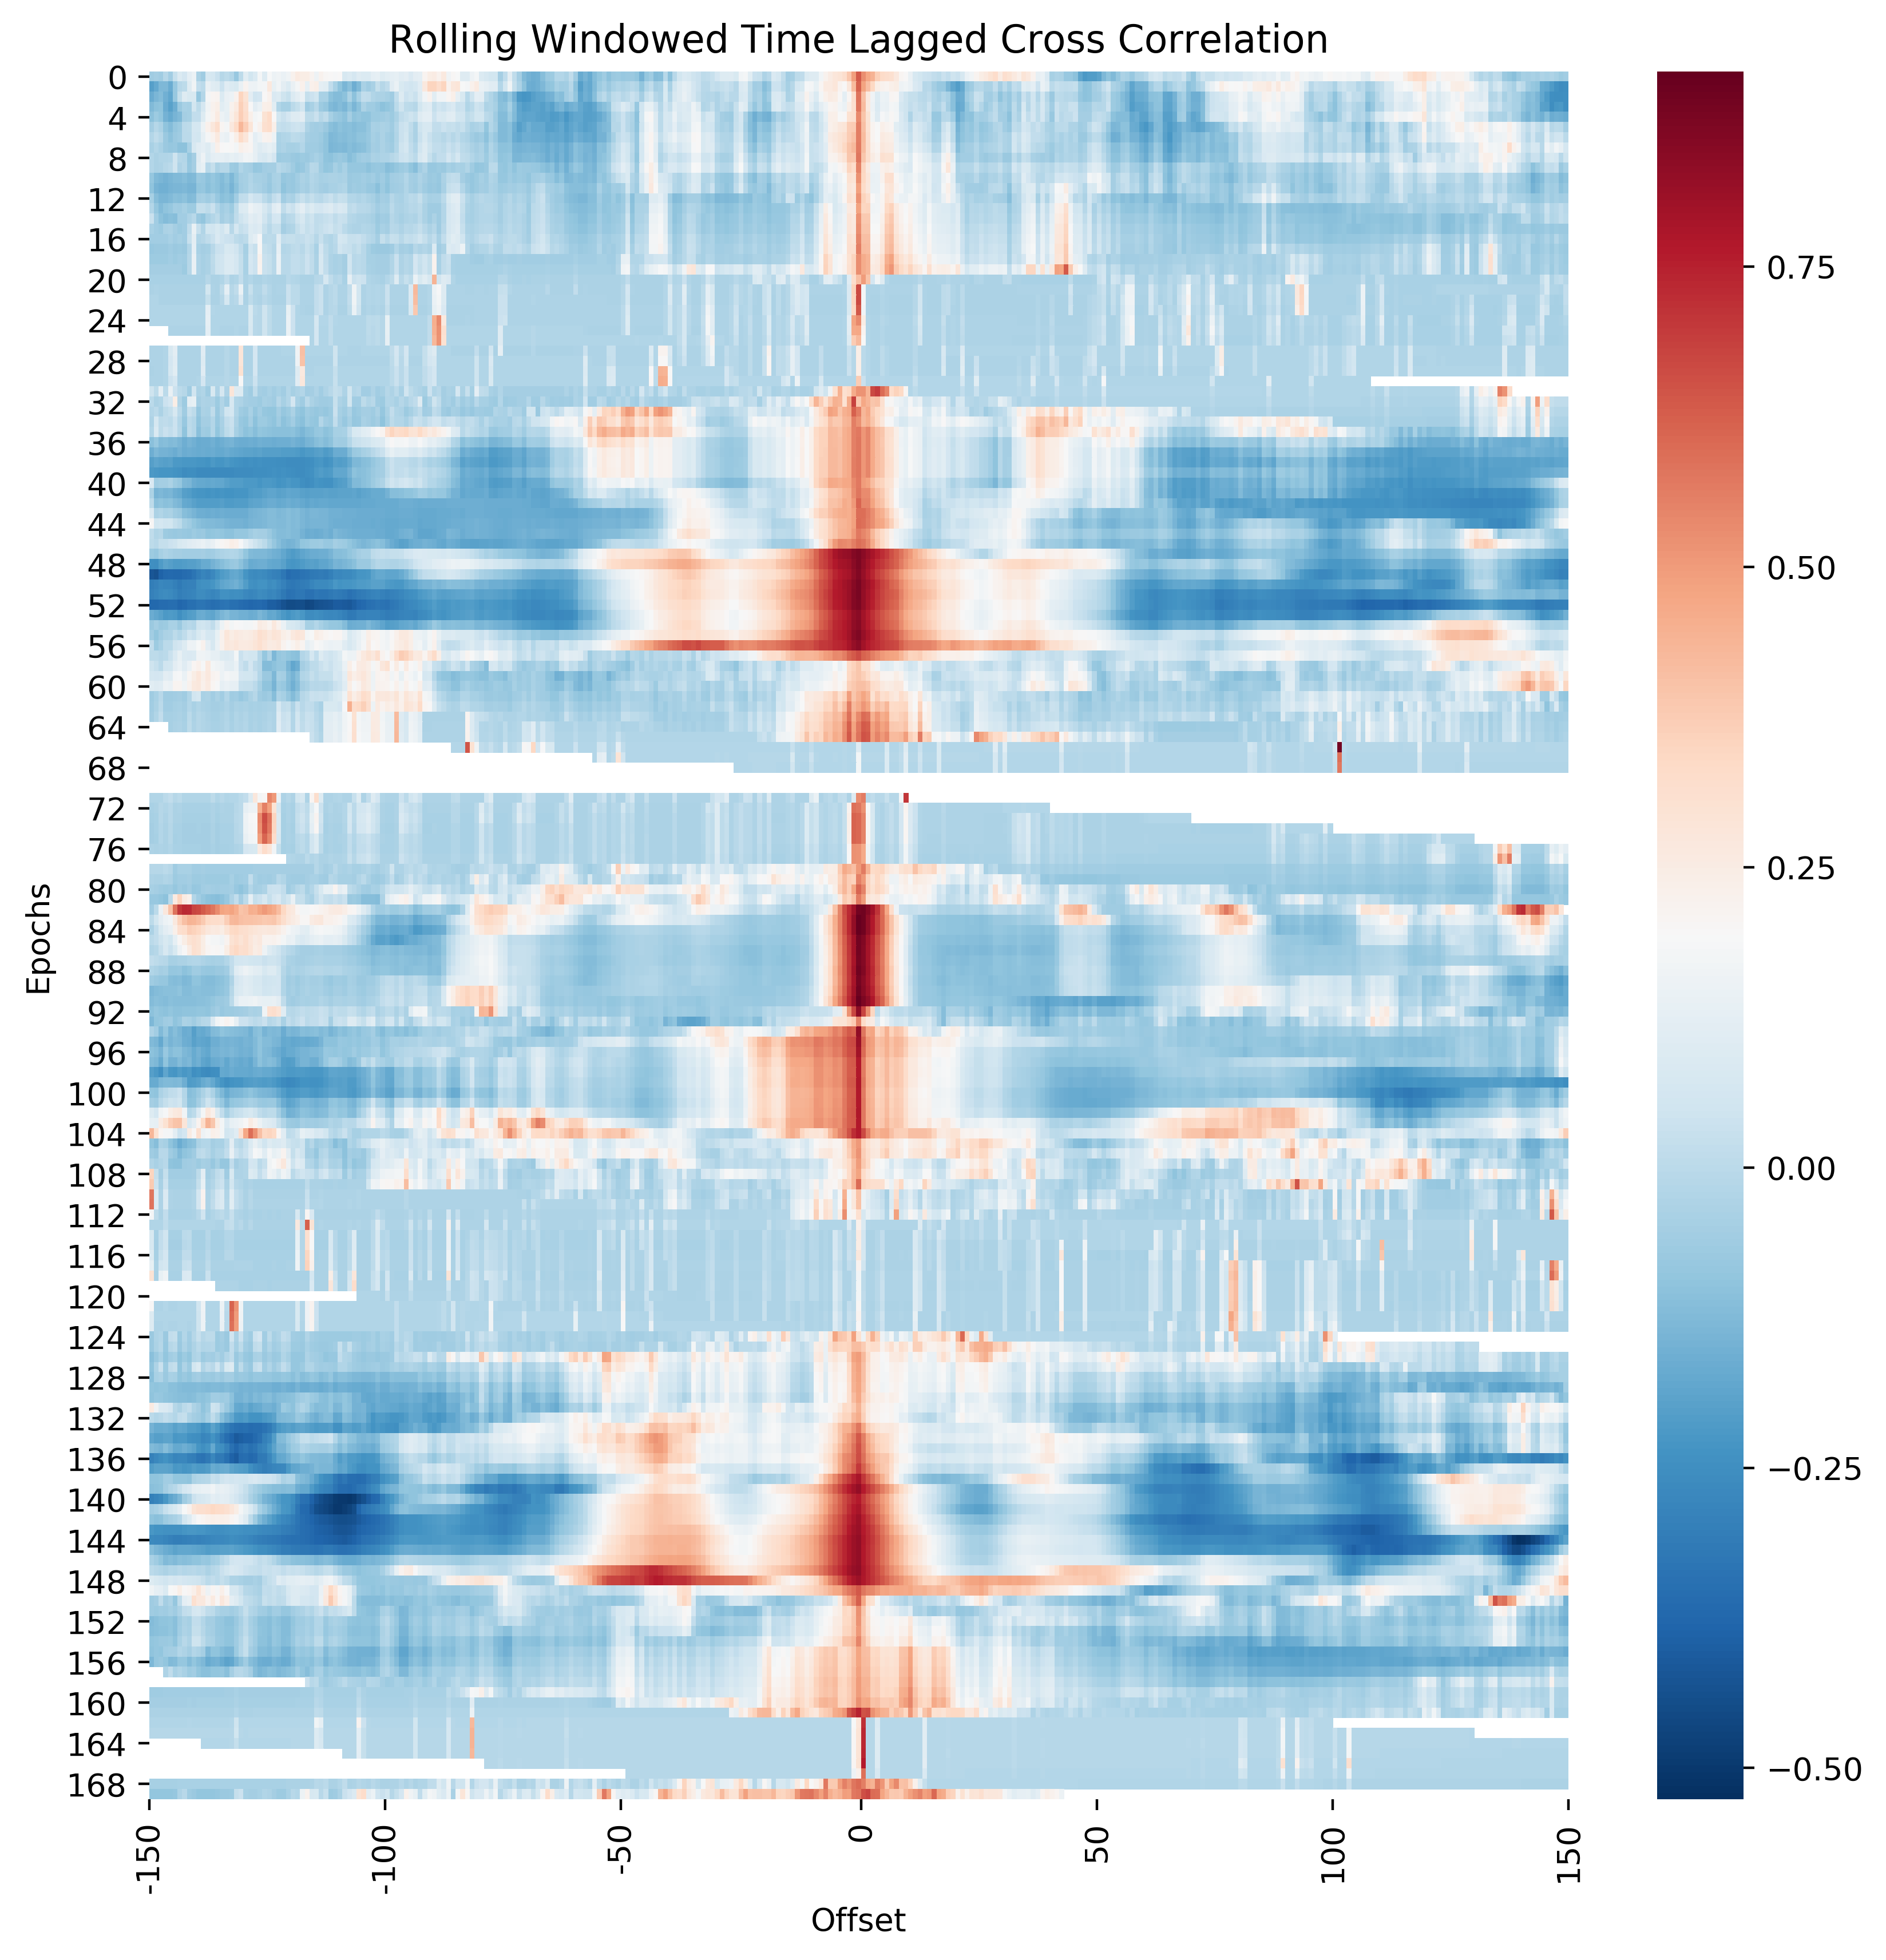

In [48]:
# Windowed time lagged cross correlation
minutes = 5
fpm = 30
no_splits = 20
samples_per_split = df.shape[0]/no_splits
rss=[]
dfn = df.reset_index()

for t in range(0, no_splits):
    d1 = dfn['Activity_Act'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = dfn['Activity_Fit'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(minutes*fpm),int(minutes*fpm+1))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# Rolling window time lagged cross correlation
minutes = 5
fpm = 30
window_size = 300 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 5400:
    d1 = dfn['Activity_Act'].iloc[t_start:t_end]
    d2 = dfn['Activity_Fit'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(minutes*fpm),int(minutes*fpm+1))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10), dpi=400)
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

At offset close to 0, seeing high correlation across many of the epochs, with some epochs with lower correlation values regardless of offset, meaning there are periods with low correlation between the two devices' activity data.

Code to shift time series data: [Andres Araujo](https://stackoverflow.com/questions/33171413/cross-correlation-time-lag-correlation-with-pandas)

In [49]:
def df_shifted(df, target=None, lag=0):
    if not lag and not target:
        return df       
    new = {}
    for c in df.columns:
        if c == target:
            new[c] = df[target]
        else:
            new[c] = df[c].shift(periods=lag)
    return  pd.DataFrame(data=new)

In [50]:
print("Offset is %s frames" % offset)
if offset > 1:
    df_new = df_shifted(df, 'Activity_Act', lag = int(offset))

    overall_pearson_r_new = df_new.corr().iloc[0,1]
    print(f"Pandas computed Pearson r: {overall_pearson_r_new}")
    # out: Pandas computed Pearson r: 0.2058774513561943

    r_new, p_new = stats.pearsonr(df_new.dropna()['Activity_Act'], df_new.dropna()['Activity_Fit'])
    print(f"Scipy computed Pearson r: {r_new} and p-value: {p_new}")
    # out: Scipy comput
    
    f_new,ax_new=plt.subplots(figsize=(7,3))
    df_new.set_index('Time').rolling(window=30,center=True).median().plot(ax=ax)
    ax_new.set(xlabel='Time',ylabel='Pearson r')
    ax_new.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Offset is 1.0 frames


In [172]:
r_window_size = 120
rolling_r = []
rdf = pd.DataFrame(columns = ['Time', 'R'])

for f in act_files:
    subject = str.split(f, "act_files/")[1][0:5]
    indices = [ff for ff, s in enumerate(fitbit_files) if subject in s] #what if there are multiple matching files?
    print(subject)
    print(indices)
    
    rs = []
    offset = []

    if not indices:
        print("subject %s no fitbit data available" % subject)
    else:
        print("merging %s with %s" % (os.path.basename(f), os.path.basename(fitbit_files[indices[0]])))
        
        header_offset = []

        with open(f, encoding='utf-8') as file:
                    for header_offset, line in enumerate(file, 1):
                        if 'Line' in line:
                            header_offset = header_offset
                            break

        act = pd.read_csv(f, skiprows=header_offset + 6)
        act['Time'] = pd.to_datetime(act['Date'] + ' ' + act['Time'])
        act = act.resample('1T', on='Time').sum()
        
        fit = pd.read_csv(fitbit_files[indices[0]])
        fit['Time'] = pd.to_datetime(fit['ActivityMinute'])
        fit['Activity'] = fit['Steps']

        df = pd.merge(act, fit, on = 'Time', suffixes = ('_Act', '_Fit'))
        df = df[['Time', 'Activity_Act', 'Activity_Fit']]
        
        rolling_r = df['Activity_Act'].rolling(window=r_window_size, center=True).corr(df['Activity_Fit'])
        rdf['Time'] = df['Time']
        rdf['R'] = rolling_r
        print(rdf)
        rdf.to_csv(home_dir + "/Box/CogNeuroLab/Wearables/data/correlation/" + subject + "_" + str(r_window_size) + "_window_rolling_r.txt")
        
#         df.set_index('Time')

#         d1 = df[['Time','Activity_Act']]
#         d2 = df[['Time','Activity_Fit']]
        
#         d1.to_csv(home_dir + "/Box/CogNeuroLab/Wearables/data/circadian_measures/raw/actiwatch/" + subject + "_act.txt", sep = " ", header = False, index = False)
#         d2.to_csv(home_dir + "/Box/CogNeuroLab/Wearables/data/circadian_measures/raw/fitbit/" + subject + "_fit.txt", sep = " ", header = False, index = False) 
    

10011
[0]
merging 10011_10_24_2019_4_30_00_PM_New_Analysis.csv with WA_10011_minuteStepsNarrow_20190901_20200327.csv
                     Time   R
0     2019-10-24 16:30:00 NaN
1     2019-10-24 16:31:00 NaN
2     2019-10-24 16:32:00 NaN
3     2019-10-24 16:33:00 NaN
4     2019-10-24 16:34:00 NaN
...                   ...  ..
20123 2019-11-07 15:53:00 NaN
20124 2019-11-07 15:54:00 NaN
20125 2019-11-07 15:55:00 NaN
20126 2019-11-07 15:56:00 NaN
20127 2019-11-07 15:57:00 NaN

[20128 rows x 2 columns]
10012
[1]
merging 10012_10_18_2019_3_30_00_PM_New_Analysis.csv with WA_10012_minuteStepsNarrow_20190901_20200327.csv
                     Time   R
0     2019-10-18 15:30:00 NaN
1     2019-10-18 15:31:00 NaN
2     2019-10-18 15:32:00 NaN
3     2019-10-18 15:33:00 NaN
4     2019-10-18 15:34:00 NaN
...                   ...  ..
20123                 NaT NaN
20124                 NaT NaN
20125                 NaT NaN
20126                 NaT NaN
20127                 NaT NaN

[20128 rows x 2 col

                     Time   R
0     2020-02-20 13:45:00 NaN
1     2020-02-20 13:46:00 NaN
2     2020-02-20 13:47:00 NaN
3     2020-02-20 13:48:00 NaN
4     2020-02-20 13:49:00 NaN
...                   ...  ..
20123 2020-03-05 13:08:00 NaN
20124 2020-03-05 13:09:00 NaN
20125 2020-03-05 13:10:00 NaN
20126 2020-03-05 13:11:00 NaN
20127 2020-03-05 13:12:00 NaN

[20128 rows x 2 columns]
20108
[17]
merging 20108_2_25_2020_4_45_00_PM_New_Analysis.csv with WA_20108_minuteStepsNarrow_20190901_20200327.csv
                     Time   R
0     2020-02-25 16:45:00 NaN
1     2020-02-25 16:46:00 NaN
2     2020-02-25 16:47:00 NaN
3     2020-02-25 16:48:00 NaN
4     2020-02-25 16:49:00 NaN
...                   ...  ..
20123                 NaT NaN
20124                 NaT NaN
20125                 NaT NaN
20126                 NaT NaN
20127                 NaT NaN

[20128 rows x 2 columns]
20113
[18]
merging 20113_2_28_2020_2_15_00_PM_New_Analysis.csv with WA_20113_minuteStepsNarrow_20190901_2020032

In [211]:
subjects = []
for f in glob.glob(home_dir + "/Box/CogNeuroLab/Wearables/data/circadian_measures/raw/actiwatch/*_act.txt"):
    subjects.append(str.split(f, "actiwatch/")[1][0:5])

subjects   

dfcor = pd.DataFrame(columns = ['Time', 'R','Subject'])
a = pd.DataFrame()

for subject in subjects:
    a = pd.read_csv(home_dir + "/Box/CogNeuroLab/Wearables/data/correlation/" + subject + "_10_window_rolling_r.txt")
    a.loc[:,'Subject'] = subject
    dfcor = pd.concat((dfcor, a))

dfcor[0:5]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


,R,Subject,Time,Unnamed: 0
0,NaN,10011,2019-10-24 16:30:00,0.0
1,NaN,10011,2019-10-24 16:31:00,1.0
2,NaN,10011,2019-10-24 16:32:00,2.0
3,NaN,10011,2019-10-24 16:33:00,3.0
4,NaN,10011,2019-10-24 16:34:00,4.0


In [232]:
import datetime as dt

dfcor['Time'] = pd.to_datetime(dfcor['Time'])
dfcor['Hour'] = dfcor['Time'].dt.hour
dfcor['Hour'] = dfcor['Hour'].astype(float)
dfm = dfcor.groupby(['Subject', 'Hour']).mean()['R']
dfm

Subject  Hour
10011    0.0     0.139213
         1.0     0.061152
         2.0     0.135681
         3.0     0.225732
         4.0     0.150240
                   ...   
20115    19.0    0.377630
         20.0    0.194753
         21.0    0.328070
         22.0    0.221494
         23.0    0.180645
Name: R, Length: 480, dtype: float64

In [243]:
dfm.groupby('Hour').mean()

Hour
0.0     0.281796
1.0     0.282439
2.0     0.283439
3.0     0.280574
4.0     0.230017
5.0     0.242924
6.0     0.293340
7.0     0.325577
8.0     0.332633
9.0     0.366684
10.0    0.390324
11.0    0.362339
12.0    0.393035
13.0    0.392728
14.0    0.366866
15.0    0.379989
16.0    0.389629
17.0    0.380125
18.0    0.364146
19.0    0.360860
20.0    0.355317
21.0    0.354799
22.0    0.363602
23.0    0.309182
Name: R, dtype: float64

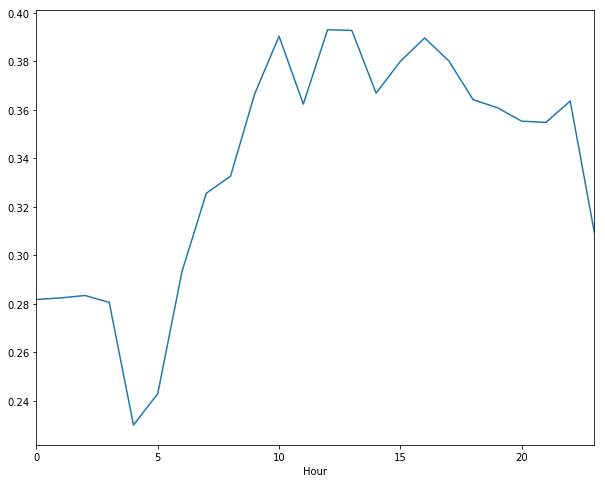

In [242]:
dfm.groupby('Hour').mean().plot(figsize = (10, 8))

In [61]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

cc = []
metrics = []
    
for f in act_files:
    subject = str.split(f, "act_files/")[1][0:5]
    indices = [ff for ff, s in enumerate(fitbit_files) if subject in s] #what if there are multiple matching files?
    print(subject)
    print(indices)
    
    rs = []
    offset = []

    if not indices:
        print("subject %s no fitbit data available" % subject)
    else:
        print("merging %s with %s" % (os.path.basename(f), os.path.basename(fitbit_files[indices[0]])))
        
        header_offset = []

        with open(f, encoding='utf-8') as file:
                    for header_offset, line in enumerate(file, 1):
                        if 'Line' in line:
                            header_offset = header_offset
                            break

        act = pd.read_csv(f, skiprows=header_offset + 6)
        act['Time'] = pd.to_datetime(act['Date'] + ' ' + act['Time'])
        act = act.resample('T', on='Time').sum()
        
        fit = pd.read_csv(fitbit_files[indices[0]])
        fit['Time'] = pd.to_datetime(fit['ActivityMinute'])
        fit['Activity'] = fit['Steps']

        df = pd.merge(act, fit, on = 'Time', suffixes = ('_Act', '_Fit'))
        df = df[['Time', 'Activity_Act', 'Activity_Fit']]
        df.set_index('Time')

        d1 = df['Activity_Act']
        d2 = df['Activity_Fit']
        minutes = 5
        fpm = 30
        rs = [crosscorr(d1,d2, lag) for lag in range(-int(minutes*fpm),int(minutes*fpm+1))]
        offset = np.ceil(len(rs)/2)-np.argmax(rs)
        
        cc.append([subject, max(rs), offset])

10011
[0]
merging 10011_10_24_2019_4_30_00_PM_New_Analysis.csv with WA_10011_minuteStepsNarrow_20190901_20200327.csv
10012
[1]
merging 10012_10_18_2019_3_30_00_PM_New_Analysis.csv with WA_10012_minuteStepsNarrow_20190901_20200327.csv
10014
[2]
merging 10014_11_11_2019_5_20_00_PM_New_Analysis.csv with WA_10014_minuteStepsNarrow_20190901_20200327.csv
10016
[3]
merging 10016_1_24_2020_11_45_00_AM_New_Analysis.csv with WA_10016_minuteStepsNarrow_20190901_20200327.csv
10023
[4]
merging 10023_11_11_2019_1_50_00_PM_New_Analysis.csv with WA_10023_minuteStepsNarrow_20190901_20200327.csv
10024
[5]
merging 10024_11_5_2019_3_15_00_PM_New_Analysis.csv with WA_10024_minuteStepsNarrow_20190901_20200327.csv
10025
[6]
merging 10025_12_5_2019_2_15_00_PM_New_Analysis.csv with WA_10025_minuteStepsNarrow_20190901_20200327.csv
10033
[7]
merging 10033_11_7_2019_2_50_00_PM_New_Analysis.csv with WA_10033_minuteStepsNarrow_20190901_20200327.csv
10035
[8]
merging 10035_2_7_2020_2_45_00_PM_New_Analysis.csv with W

In [63]:
cc_df = pd.DataFrame(cc, columns = ['subject', 'cross_cor', 'offset'])
cc_df.to_csv(home_dir + "/Box/CogNeuroLab/Wearables/data/crosscor.csv")
cc_df[0:5]

,subject,cross_cor,offset
0,10011,0.463774,1.0
1,10012,0.762435,1.0
2,10014,0.596735,1.0
3,10016,0.750365,1.0
4,10023,0.650556,1.0


Text(0, 0.5, 'Mean Cross-Correlation')

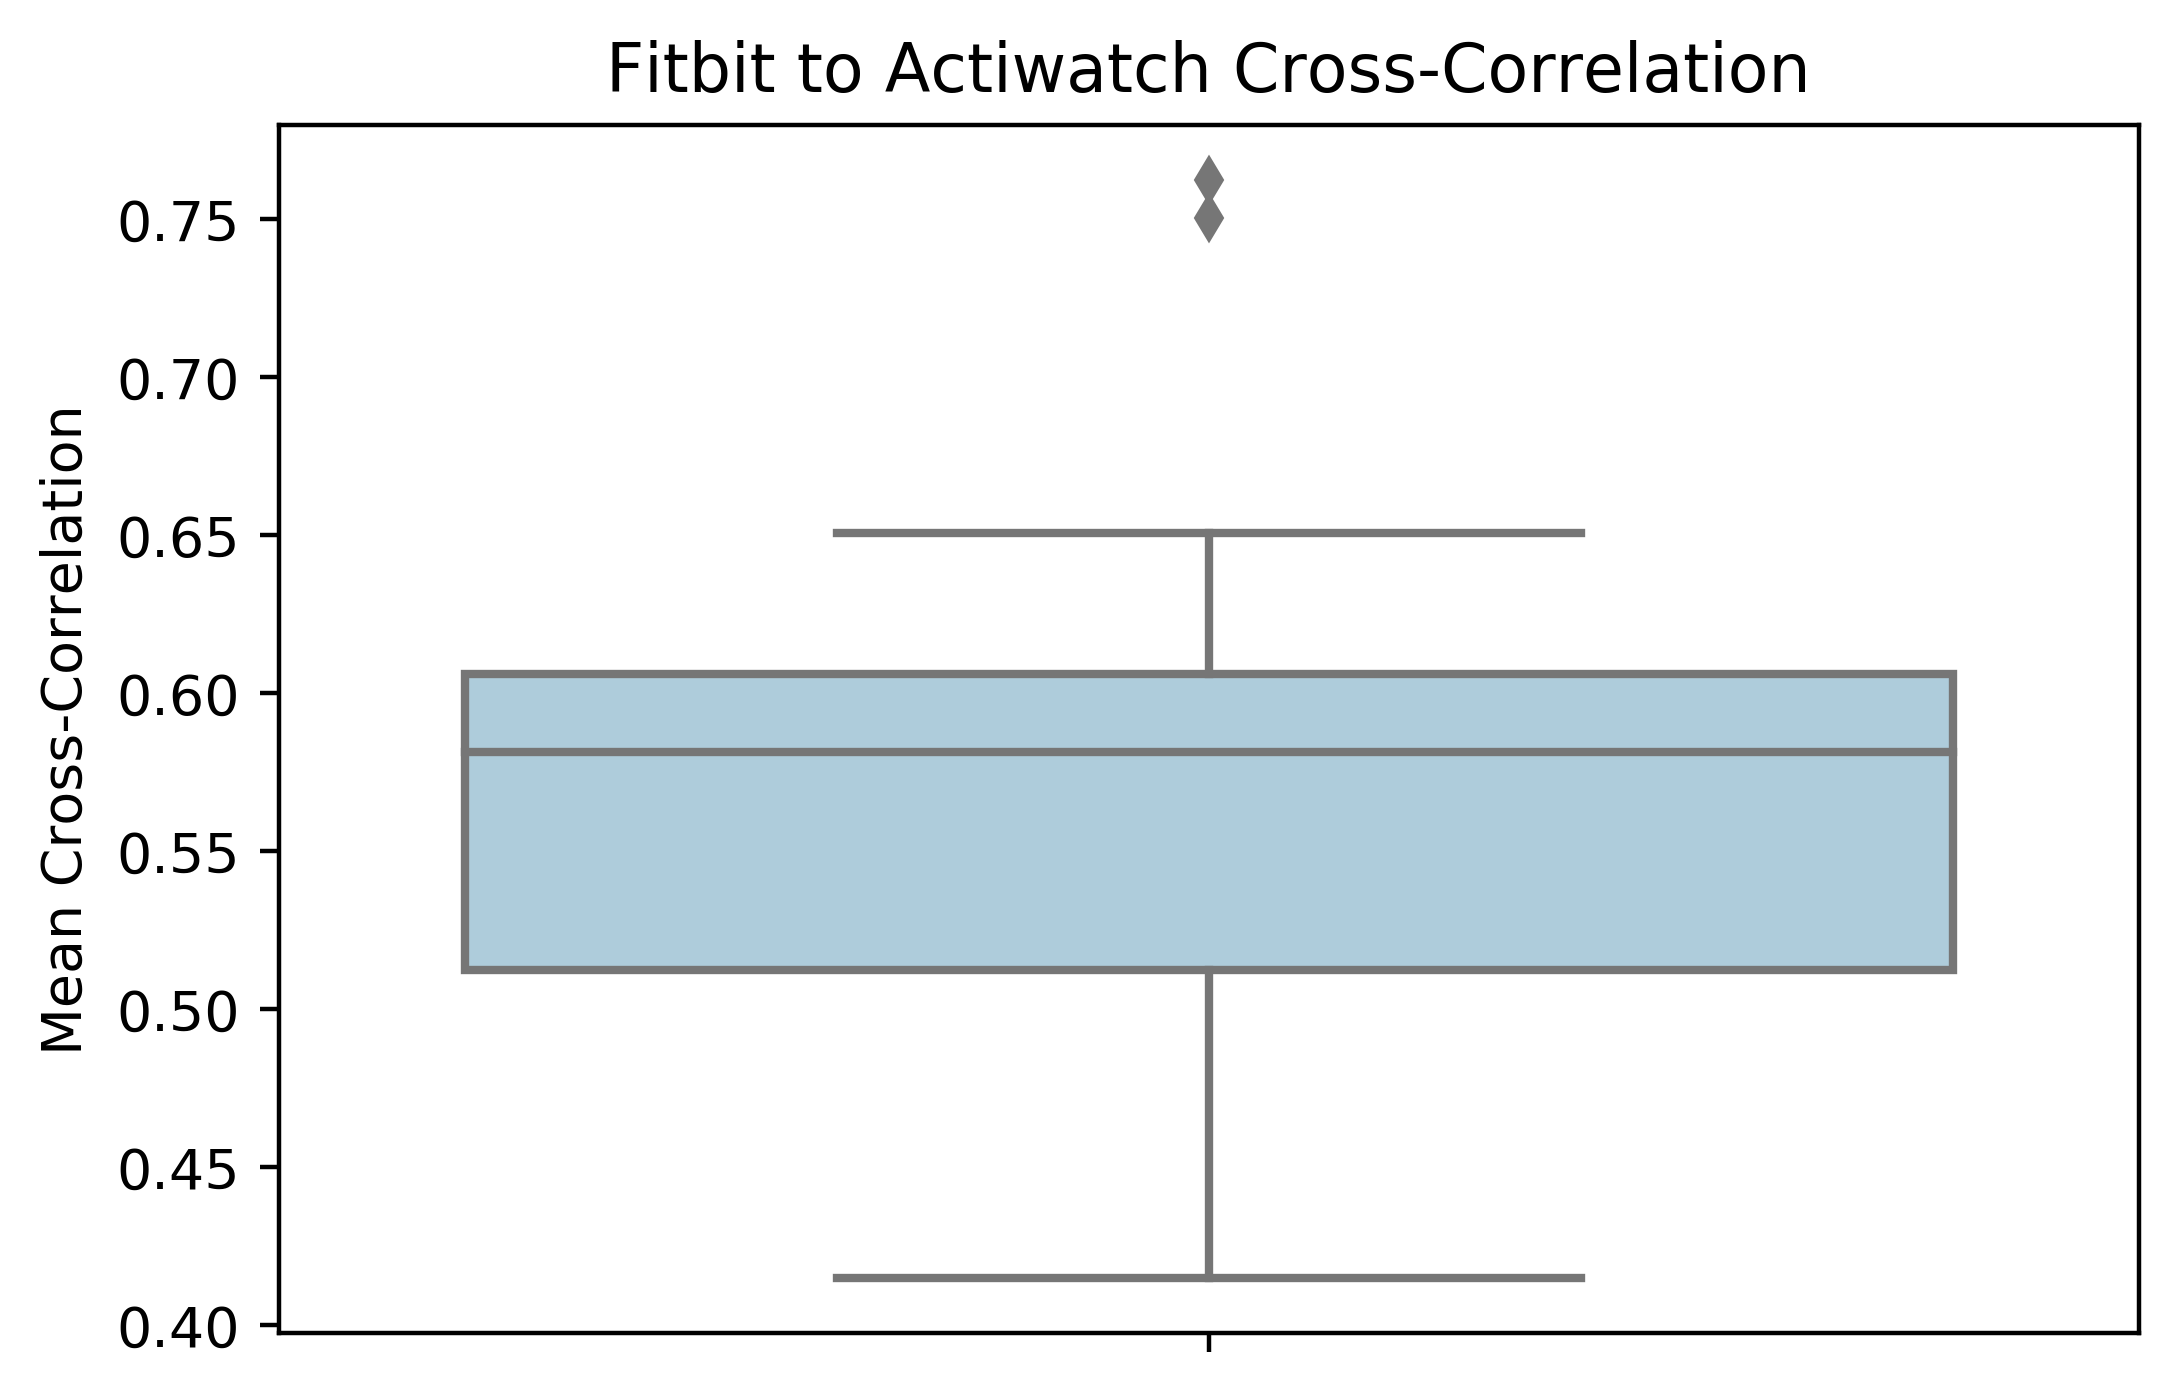

In [64]:
sns.set_palette(sns.color_palette('Paired'))
fig, axes = plt.subplots(dpi=400)
sns.boxplot(y = cc_df['cross_cor'], ax = axes)
axes.set_title('Fitbit to Actiwatch Cross-Correlation')
axes.set_xlabel('')
axes.set_ylabel('Mean Cross-Correlation')


** Future ** 
1. Sleep stages (Where is this info for actiwatch? For fitbit, read in the sleep file)
2. Add metrics (sleep efficiency, onset latency, rest-activity measures, etc.)
3. Group comparisons between young and old

In [201]:
#total slep time

 # problem with fitbit on this subject?

In [401]:
fb_sleep_files = glob.glob(home_dir + "/Box/CogNeuroLab/Wearables/data/fitbit/*sleepDay*", recursive=True)
tst_cor = []

for f in act_files:
    subject = str.split(f, "act_files/")[1][0:5]
    indices = [ff for ff, s in enumerate(fitbit_sleep_files) if subject in s] #what if there are multiple matching files?
    print(subject)
    print(indices)
    
    rs = []
    offset = []

    if not indices:
        print("subject %s no fitbit data available" % subject)
    else:
        print("merging %s with %s" % (os.path.basename(f), os.path.basename(fitbit_sleep_files[indices[0]])))
        
        header_offset = []
        footer_offset = []
        rpx = []

        with open(f, encoding='utf-8') as file:
                    for header_offset, line in enumerate(file, 1):
                        if 'Statistics' in line:
                            header_offset = header_offset
                            break

        with open(f, encoding='utf-8') as file:
                    for footer_offset, line in enumerate(file, 1):
                        if 'Line' in line:
                            footer_offset = footer_offset +6
                            break

        subject = str.split(f, "act_files/")[1][0:5]


        rpx_metrics = pd.read_csv(f, skiprows=header_offset, nrows=footer_offset-header_offset, engine='python')
        rpx_metrics = rpx_metrics[rpx_metrics['Interval Type'] == 'SLEEP']
        rpx_metrics['Sleep Time'] = rpx_metrics['Sleep Time'].astype(float)
        rpx_metrics['Start Date'] = pd.to_datetime(rpx_metrics['Start Date'])
    
        fb_sleep = pd.read_csv(fitbit_sleep_files[indices[0]], engine='python')
        fb_sleep['Start Date'] = pd.to_datetime(fb_sleep['SleepDay'])
        fb_sleep['Sleep Efficiency'] = (tst_df['TotalMinutesAsleep']/tst_df['TotalTimeInBed'])*100
        
        tst_df = pd.merge(rpx_metrics, fb_sleep, on = 'Start Date')
        
        try:
            r = np.corrcoef(tst_df['Sleep Time'], tst_df['TotalMinutesAsleep'])[0,1]
            m_act = np.mean(tst_df['Sleep Time'])
            m_fit = np.mean(tst_df['TotalMinutesAsleep'])
            m_eff_act = np.nanmean(tst_df['Efficiency'].astype(float))
            m_eff_fit = np.nanmean(tst_df['Sleep Efficiency'])
            
            
            print(r)
            print(m_act)
            print(m_fit)
            
            tst_cor.append([r, 'Actiwatch', m_act, m_eff_act])
            tst_cor.append([r, 'Fitbit', m_fit, m_eff_fit])
        except:
            'NA'

tst_cor = pd.DataFrame(tst_cor, columns = ['tst_cor', 'device', 'tst_mean', 'efficiency_mean'])

10011
[0]
merging 10011_10_24_2019_4_30_00_PM_New_Analysis.csv with WA_10011_sleepDay_20190801_20200223.csv
0.43712572020543233
404.75
452.75
10012
[1]
merging 10012_10_18_2019_3_30_00_PM_New_Analysis.csv with WA_10012_sleepDay_20190801_20200223.csv
0.5577895564104254
460.625
468.75
10014
[2]
merging 10014_11_11_2019_5_20_00_PM_New_Analysis.csv with WA_10014_sleepDay_20190801_20200223.csv
-0.24001630690962514
463.375
398.25
10016
[3]
merging 10016_1_24_2020_11_45_00_AM_New_Analysis.csv with WA_10016_sleepDay_20190801_20200223.csv
0.5150449868048569
364.94444444444446
406.44444444444446
10023
[4]
merging 10023_11_11_2019_1_50_00_PM_New_Analysis.csv with WA_10023_sleepDay_20190801_20200223.csv
0.010588429625877095
352.0
334.09090909090907
10024
[5]
merging 10024_11_5_2019_3_15_00_PM_New_Analysis.csv with WA_10024_sleepDay_20190801_20200223.csv
0.8861869111036961
374.0357142857143
426.07142857142856
10025
[6]
merging 10025_12_5_2019_2_15_00_PM_New_Analysis.csv with WA_10025_sleepDay_20190

In [40]:
fitbit_sleep_files = glob.glob(home_dir + "/Box/CogNeuroLab/Wearables/data/fitbit/*sleepDay*.csv")
fitbit_sleep_files

fit_sleep = pd.DataFrame(columns = ['SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'Subject'])


for file in fitbit_sleep_files:
    subject = str.split(file, "WA_")[1][0:5]
    print(subject)
    
    a = pd.read_csv(file, sep = ",")
    a['Subject'] = subject
    fit_sleep = pd.concat((fit_sleep, a))

fit_sleep['interval_number'] = fit_sleep.index
fit_sleep

10011
10012
10014
10016
10023
10024
10025
10033
10035
10038
10040
10045
10049
10062
10076
20103
20105
20108
20113
20115


,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Subject,interval_number
0,10/25/2019 12:00:00 AM,1,508,556,10011,0
1,11/4/2019 12:00:00 AM,1,450,488,10011,1
2,11/5/2019 12:00:00 AM,1,480,544,10011,2
3,11/6/2019 12:00:00 AM,1,405,429,10011,3
4,11/7/2019 12:00:00 AM,1,373,404,10011,4
...,...,...,...,...,...,...
8,3/22/2020 12:00:00 AM,1,491,553,20115,8
9,3/23/2020 12:00:00 AM,1,423,477,20115,9
10,3/24/2020 12:00:00 AM,2,448,457,20115,10
11,3/25/2020 12:00:00 AM,1,508,573,20115,11


In [57]:
act_sleep = pd.read_csv(home_dir + "/Box/CogNeuroLab/Wearables/data/actiwatch/Combined Export File WA (2).csv")
act_sleep = act_sleep[act_sleep['interval_type'] == 'SLEEP']
act_sleep['interval_number'] = act_sleep['interval_number'].astype(int) - 1
act_sleep

,analysis_name,subject_id,data_start_date,data_start_time,interval_type,interval_number,start_date,start_time,end_date,end_time,...,percent_immobile,fragmentation,number_of_scores,number_of_manual,number_of_scheduled,number_of_no_responses,avg_score,avg_manual,avg_scheduled,Unnamed: 30
39,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,0,10/24/2019,8:55:00 PM,10/25/2019,6:07:00 AM,...,89.13,14.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,1,10/25/2019,10:42:30 PM,10/26/2019,6:44:30 AM,...,92.95,7.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,2,10/26/2019,10:11:00 PM,10/27/2019,7:09:30 AM,...,93.59,18.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,3,10/28/2019,12:17:30 AM,10/28/2019,5:57:30 AM,...,92.35,14.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,4,10/28/2019,11:29:00 PM,10/29/2019,6:02:00 AM,...,93.26,6.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,New Analysis,20115,3/12/2020,2:40:00 PM,SLEEP,9,3/21/2020,10:58:00 PM,3/22/2020,8:02:00 AM,...,86.67,19.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1508,New Analysis,20115,3/12/2020,2:40:00 PM,SLEEP,10,3/22/2020,11:23:30 PM,3/23/2020,7:07:00 AM,...,88.03,23.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1509,New Analysis,20115,3/12/2020,2:40:00 PM,SLEEP,11,3/23/2020,10:47:30 PM,3/24/2020,7:22:30 AM,...,87.96,22.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1510,New Analysis,20115,3/12/2020,2:40:00 PM,SLEEP,12,3/24/2020,10:03:30 PM,3/25/2020,6:48:30 AM,...,88.38,19.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
fit_sleep['Subject'] = fit_sleep['Subject'].astype('int')
fit_sleep['interval_number'] = fit_sleep['interval_number'].astype('int')
act_sleep['interval_number'] = act_sleep['interval_number'].astype('int')

In [65]:
df_sleep = pd.merge(act_sleep, fit_sleep,  how='left', left_on=['subject_id','interval_number'], right_on = ['Subject','interval_number'])
df_sleep

,analysis_name,subject_id,data_start_date,data_start_time,interval_type,interval_number,start_date,start_time,end_date,end_time,...,number_of_no_responses,avg_score,avg_manual,avg_scheduled,Unnamed: 30,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Subject
0,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,0,10/24/2019,8:55:00 PM,10/25/2019,6:07:00 AM,...,NaN,NaN,NaN,NaN,NaN,10/25/2019 12:00:00 AM,1,508,556,10011.0
1,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,1,10/25/2019,10:42:30 PM,10/26/2019,6:44:30 AM,...,NaN,NaN,NaN,NaN,NaN,11/4/2019 12:00:00 AM,1,450,488,10011.0
2,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,2,10/26/2019,10:11:00 PM,10/27/2019,7:09:30 AM,...,NaN,NaN,NaN,NaN,NaN,11/5/2019 12:00:00 AM,1,480,544,10011.0
3,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,3,10/28/2019,12:17:30 AM,10/28/2019,5:57:30 AM,...,NaN,NaN,NaN,NaN,NaN,11/6/2019 12:00:00 AM,1,405,429,10011.0
4,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,4,10/28/2019,11:29:00 PM,10/29/2019,6:02:00 AM,...,NaN,NaN,NaN,NaN,NaN,11/7/2019 12:00:00 AM,1,373,404,10011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,New Analysis,20115,3/12/2020,2:40:00 PM,SLEEP,9,3/21/2020,10:58:00 PM,3/22/2020,8:02:00 AM,...,NaN,NaN,NaN,NaN,NaN,3/23/2020 12:00:00 AM,1,423,477,20115.0
270,New Analysis,20115,3/12/2020,2:40:00 PM,SLEEP,10,3/22/2020,11:23:30 PM,3/23/2020,7:07:00 AM,...,NaN,NaN,NaN,NaN,NaN,3/24/2020 12:00:00 AM,2,448,457,20115.0
271,New Analysis,20115,3/12/2020,2:40:00 PM,SLEEP,11,3/23/2020,10:47:30 PM,3/24/2020,7:22:30 AM,...,NaN,NaN,NaN,NaN,NaN,3/25/2020 12:00:00 AM,1,508,573,20115.0
272,New Analysis,20115,3/12/2020,2:40:00 PM,SLEEP,12,3/24/2020,10:03:30 PM,3/25/2020,6:48:30 AM,...,NaN,NaN,NaN,NaN,NaN,3/26/2020 12:00:00 AM,2,434,462,20115.0


In [62]:
act_sleep.columns

Index(['analysis_name', 'subject_id', 'data_start_date', 'data_start_time',
       'interval_type', 'interval_number', 'start_date', 'start_time',
       'end_date', 'end_time', 'duration', 'off_wrist', 'percent_off_wrist',
       'total_ac', 'percent_invalid_sw', 'onset_latency', 'efficiency',
       'wake_time', 'percent_wake', 'sleep_time', 'percent_sleep',
       'percent_immobile', 'fragmentation', 'number_of_scores',
       'number_of_manual', 'number_of_scheduled', 'number_of_no_responses',
       'avg_score', 'avg_manual', 'avg_scheduled', 'Unnamed: 30'],
      dtype='object')

In [63]:
fit_sleep.columns

Index(['SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed',
       'Subject', 'interval_number'],
      dtype='object')

## Total Sleep Time Correlation

In [69]:
column_1 = df_sleep["sleep_time"].astype('float')
column_2 = df_sleep["TotalMinutesAsleep"].astype('float')
correlation = column_1.corr(column_2)
correlation

0.6274709645794498

In [86]:
print("Actiwatch mean TST is %.2f +/- %.2f" % (df_sleep["sleep_time"].astype('float').mean(), df_sleep["sleep_time"].astype('float').std()))
print("Fitbit mean TST is %.2f +/- %.2f" % (df_sleep["TotalMinutesAsleep"].astype('float').mean(), df_sleep["TotalMinutesAsleep"].astype('float').std()))


Actiwatch mean TST is 421.75 +/- 106.93
Fitbit mean TST is 428.77 +/- 100.81


In [90]:
df_sleep["sleep_time"].astype('float').mean() - df_sleep["TotalMinutesAsleep"].astype('float').mean()

-7.0166937010002925

## Time In Bed Correlation

In [70]:
df_sleep['tib'] = (df_sleep["sleep_time"].astype('float') * 100)/df_sleep["percent_sleep"].astype('float')
column_1 = df_sleep["tib"].astype('float')
column_2 = df_sleep["TotalTimeInBed"].astype('float')
correlation = column_1.corr(column_2)
correlation

0.5758078399291401

In [71]:
df_sleep['tib']

0      551.997205
1      482.014388
2      538.528421
3      339.984817
4      392.996531
          ...    
269    543.998220
270    463.475524
271    515.000542
272    524.980699
273    530.477759
Name: tib, Length: 274, dtype: float64

In [72]:
df_sleep["TotalTimeInBed"].astype('float')

0      556.0
1      488.0
2      544.0
3      429.0
4      404.0
       ...  
269    477.0
270    457.0
271    573.0
272    462.0
273      NaN
Name: TotalTimeInBed, Length: 274, dtype: float64

In [87]:
print("Actiwatch mean TIB is %.2f +/- %.2f" % (df_sleep["tib"].astype('float').mean(), df_sleep["tib"].astype('float').std()))
print("Fitbit mean TIB is %.2f +/- %.2f" % (df_sleep["TotalTimeInBed"].astype('float').mean(), df_sleep["TotalTimeInBed"].astype('float').std()))


Actiwatch mean TIB is 466.92 +/- 113.54
Fitbit mean TIB is 458.29 +/- 108.92


In [91]:
df_sleep["tib"].astype('float').mean() - df_sleep["TotalTimeInBed"].astype('float').mean()

8.624066661546749